# Implementing linear regression model



**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**Load and View datasets**

In [4]:
# Load data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

# View the data
train_data.head()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Preprocessing the Data**

In [5]:
# Feature selection based on the columns available in train_data
X = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = train_data['SalePrice']

**Split the Data**

In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Initialising and training**

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluation**

In [8]:
# Predict on validation data
y_pred = model.predict(X_val)

# Calculate MSE
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2810942965.2180653


**Prepare and Predict Test data**

In [9]:
# Prepare the test data
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Predict on test data
test_predictions = model.predict(X_test)

**Preparing  and Downloading Submission File**

In [10]:
# Prepare the submission file
submission = sample_submission.copy()
submission['SalePrice'] = test_predictions
submission.to_csv('house_price_predictions.csv', index=False)

**Visualizing**

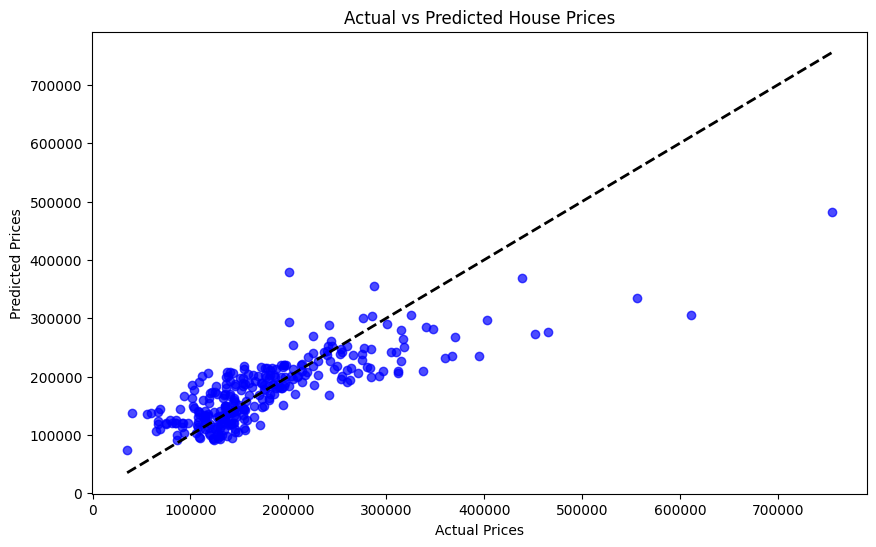

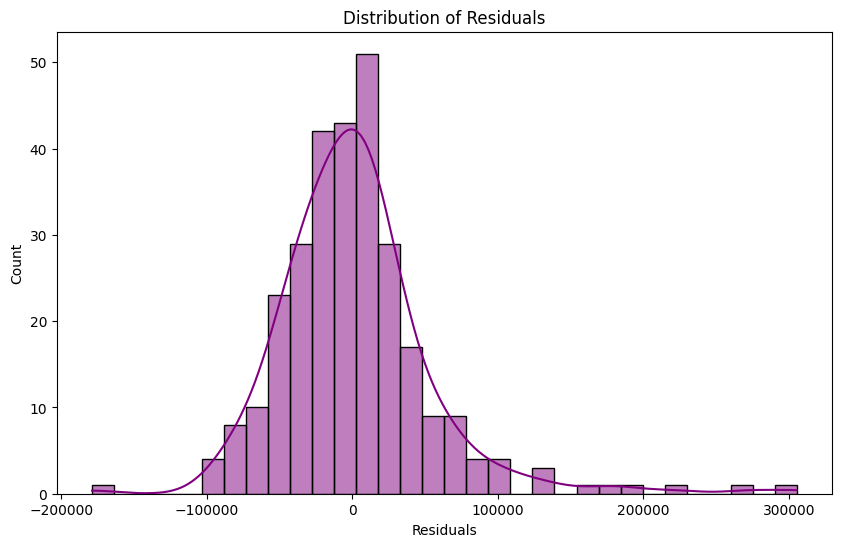

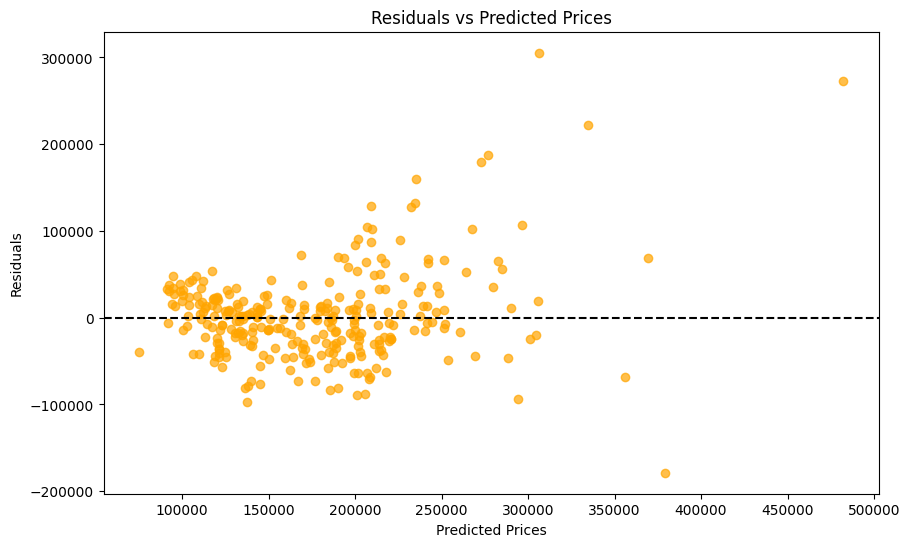

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='b')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 2. Plot Residuals
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# 3. Residuals vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()